In [11]:
import pandas
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

In [12]:
clean_dataset = pandas.read_csv('bank-additional-clean.csv', sep=';')
#Separamos el dataset en columnas X e Y (COMÚN)
x = clean_dataset.drop('y', axis=1)
y = clean_dataset['y']

#Normalizamos X porque vamos a entrenar con X a nuestro modelo (COMÚN)
norm = StandardScaler()
x_normalized = norm.fit_transform(x)

#Hacemos el split y obtenemos los parámetros de entrenamiento y testeo (COMÚN)
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.3, random_state=123)

Implementamos el modelo con los parámetros obtenidos a través del procesdo de RandomizedSearchCV

In [13]:
knn = KNeighborsClassifier(
  n_neighbors= 8,
  weights= 'distance',
  p= 2,
  leaf_size= 15,
  algorithm= 'ball_tree'
)

knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

Evaluamos el modelo para ver si los resultados coinciden con los esperados

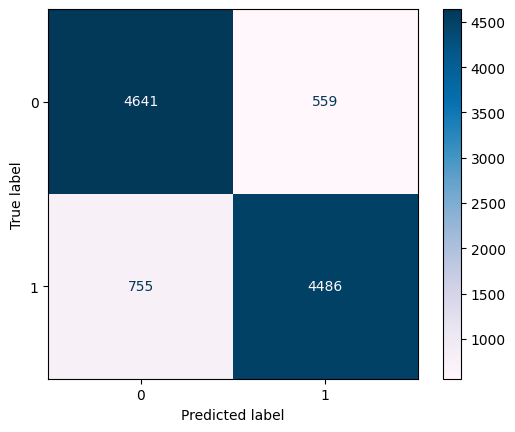

In [14]:
confmatrix = confusion_matrix(y_test, prediction)
visual_confmatrix = ConfusionMatrixDisplay(confmatrix)
visual_confmatrix.plot(cmap='PuBu')

In [15]:
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

metrics = {
  'Exactitud': [accuracy],
  'Precisión': [precision],
  'Sensibilidad': [recall]
}

df_metrics = pandas.DataFrame(metrics)
x1 = df_metrics.columns
y1 = df_metrics.iloc[0]

Evaluamos el modelo también con Cross Validation y comparamos

In [16]:
from sklearn.model_selection import KFold, cross_val_score
kfolds = KFold(n_splits=5, shuffle=True)

In [17]:
accuracy_crossval = cross_val_score(
  estimator=knn,
  X=x_train,
  y=y_train,
  scoring='accuracy',
  cv=kfolds
)
precision_crossval = cross_val_score(
  estimator=knn,
  X=x_train,
  y=y_train,
  scoring='precision',
  cv=kfolds
)
recall_crossval = cross_val_score(
  estimator=knn,
  X=x_train,
  y=y_train,
  scoring='recall',
  cv=kfolds
)

In [18]:
crossvalues = {
  'Exactitud': [round(accuracy_crossval.mean(), 2)],
  'Precisión': [round(precision_crossval.mean(), 2)],
  'Sensibilidad': [round(recall_crossval.mean(), 2)]
}

df_crossvalues = pandas.DataFrame(crossvalues)
x2 = df_crossvalues.columns
y2 = df_crossvalues.iloc[0]

Graficamos los resultados obtenidos

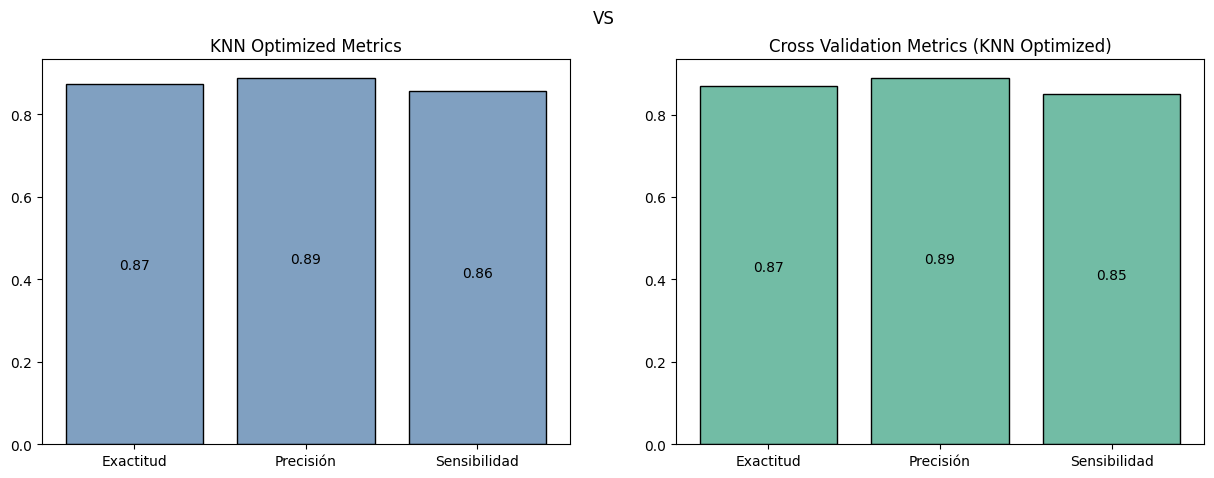

In [23]:
pyplot.figure(figsize=(15,5))
pyplot.suptitle('VS')
pyplot.subplot(121)
pyplot.title('KNN Optimized Metrics')
pyplot.bar(x1, y1, edgecolor='black', color='#80a0c1')
for index, metric in enumerate(x1):
  pyplot.text(float(index), float(df_metrics[metric].iloc[0]-0.45), f'{df_metrics[metric].iloc[0]:.2f}', ha='center')
pyplot.subplot(122)
pyplot.title('Cross Validation Metrics (KNN Optimized)')
ax2 = pyplot.bar(x2, y2, edgecolor='black', color='#72bca5')
for index, metric in enumerate(x2):
  pyplot.text(float(index), float(df_crossvalues[metric].iloc[0]-0.45), f'{df_crossvalues[metric].iloc[0]}', ha='center')